# Informer Demo

## Download code and dataset

In [58]:
import sys
sys.path.append('바탕화면/Informer2020')

In [4]:
if not 'Informer2020' in sys.path:
    sys.path += ['Informer2020']

## SWaT 전처리

In [189]:
import pandas as pd
swat = pd.read_csv('./dataset/SWaT/SWaT_Dataset_Normal_v0.csv', header=1) # 원본 데이터에는 Timestamp 앞에 띄어쓰기 있음...
swat.date = pd.to_datetime(swat.date)
swat = swat.set_index('date')
#swat = swat.set_index(pd.DatetimeIndex(swat['date']))
# nyc = nyc.resample(rule='H').mean()


In [190]:
swat_x = swat.iloc[:, 0:-1]
swat_y = swat.iloc[-1]

In [191]:
swat.head(10)

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
date,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:05,2.425456,260.0495,2,2,1,244.5847,8.19008,306.101,2.465127,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:06,2.472857,260.2065,2,2,1,244.5847,8.19008,306.101,2.464742,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:07,2.513532,260.5991,2,2,1,244.5847,8.19008,306.101,2.468331,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:08,2.559972,261.0309,2,2,1,244.5847,8.19008,306.101,2.469612,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal


In [192]:
df = swat_x.iloc[:,0].resample('10S').mean()
for i in range(1, len(swat_x.columns)):
    df2 = swat_x.iloc[:,i].resample('10S').mean()
    df = pd.concat([df,df2], axis=1)

In [193]:
df

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
date,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.479006,260.68542,2.0,2.0,1,244.48859,8.190080,306.10100,2.467895,2.0,...,0.000000,1.0,1,10.029480,0.000000,4.277749,0.000256,1,1.0,1
2015-12-22 16:00:10,2.619607,261.36449,2.0,2.0,1,244.95640,8.190080,305.96258,2.473521,2.0,...,0.000000,1.0,1,10.029480,0.000000,4.277749,0.000256,1,1.0,1
2015-12-22 16:00:20,2.482433,262.00037,2.0,2.0,1,245.44990,8.192226,305.77802,2.473059,2.0,...,0.000000,1.0,1,10.048706,0.000000,4.277749,0.000256,1,1.0,1
2015-12-22 16:00:30,2.573135,262.40076,2.0,2.0,1,245.68057,8.193604,305.74726,2.470522,2.0,...,0.000000,1.0,1,10.056717,0.000000,4.277749,0.000256,1,1.0,1
2015-12-22 16:00:40,2.571117,262.18488,2.0,2.0,1,246.04270,8.196168,305.71136,2.470740,2.0,...,0.000000,1.0,1,10.029480,0.000000,4.277749,0.000256,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28 09:59:10,2.634084,522.57982,2.0,2.0,1,262.01610,8.391823,328.53120,2.443341,2.0,...,0.306979,2.0,1,251.062240,1.704418,189.783040,0.000128,1,1.0,1
2015-12-28 09:59:20,2.524005,523.22356,2.0,2.0,1,262.01610,8.388265,328.63112,2.442149,2.0,...,0.306633,2.0,1,251.361820,1.698010,190.063450,0.000128,1,1.0,1
2015-12-28 09:59:30,2.517791,521.63381,2.0,2.0,1,262.01610,8.388105,328.65930,2.441111,2.0,...,0.306633,2.0,1,251.212800,1.677185,189.930450,0.000128,1,1.0,1


In [194]:
df.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,49680.000000,49680.000000,49680.000000,49680.000000,49680.0,49680.000000,49680.000000,49680.000000,49680.000000,49680.000000,...,49680.000000,49680.000000,49680.0,49680.000000,49680.000000,49680.000000,49680.000000,49680.0,49680.000000,49680.0
mean,1.844964,586.098840,1.718364,1.746860,1.0,263.738990,8.387852,348.230699,1.828534,1.744203,...,0.306141,1.993281,1.0,250.927892,1.183117,190.271470,0.014376,1.0,1.007915,1.0
std,1.133494,123.875750,0.454305,0.433916,0.0,4.835793,0.090167,49.421935,1.061368,0.440197,...,0.025349,0.081675,0.0,19.697007,0.214691,15.283692,0.144821,0.0,0.083627,0.0
min,0.000000,121.055510,0.100000,1.000000,1.0,244.488590,8.190080,300.845900,0.000000,0.200000,...,0.000000,1.000000,1.0,8.891951,0.000000,3.108177,0.000000,1.0,1.000000,1.0
25%,0.000000,508.240797,1.000000,1.000000,1.0,260.702400,8.349462,327.275100,0.114478,1.000000,...,0.306735,2.000000,1.0,249.975970,1.057252,188.983567,0.000000,1.0,1.000000,1.0
50%,2.500512,525.508070,2.000000,2.000000,1.0,265.284500,8.366572,330.940800,2.443059,2.000000,...,0.308362,2.000000,1.0,253.028100,1.121328,191.970000,0.000064,1.0,1.000000,1.0
75%,2.578043,675.835345,2.000000,2.000000,1.0,266.982800,8.407588,335.324300,2.451671,2.000000,...,0.309900,2.000000,1.0,255.030763,1.201422,193.865332,0.000115,1.0,1.000000,1.0
max,2.682862,1000.000000,2.000000,2.000000,1.0,271.930280,8.987344,567.334050,2.486669,2.000000,...,0.315473,2.000000,1.0,264.643700,3.205395,200.628000,1.742043,1.0,2.000000,1.0


In [195]:
# train, val, test split(시간단위로 해놓음, 변경해도됨)
train_df = df.iloc[:37440]
val_df = df.iloc[37440:37440+6120]
test_df = df.iloc[37440+6120:]

In [199]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(train_df)
trans_df = scaler.transform(df)
norm_data = pd.DataFrame(data=trans_df, index=df.index, columns=df.columns, dtype=None, copy=None)

In [264]:
import joblib
joblib.dump(scaler, 'SWaT_standard_scaler.pkl')

['SWaT_standard_scaler.pkl']

In [262]:
scaler.var_

array([1.28522074e+00, 1.61870193e+04, 2.06447752e-01, 1.88947136e-01,
       0.00000000e+00, 2.95169339e+01, 1.04510894e-02, 3.04438456e+03,
       1.13289740e+00, 1.94386740e-01, 0.00000000e+00, 0.00000000e+00,
       1.89903147e-01, 0.00000000e+00, 2.32017867e-01, 0.00000000e+00,
       4.57678609e+01, 6.82580114e-01, 1.21054010e+04, 8.33184890e-03,
       1.67004048e-01, 2.48153264e-02, 3.07004472e-02, 5.20278799e-03,
       1.47619576e-01, 3.78484618e+03, 1.46046051e+02, 2.48392437e-02,
       1.11466604e+04, 0.00000000e+00, 8.42598388e-03, 0.00000000e+00,
       0.00000000e+00, 8.43243377e-03, 3.20482272e-03, 1.57588354e+02,
       3.31691652e+01, 1.13790935e+02, 2.50937102e-02, 1.39626361e-02,
       4.69219799e-03, 8.52150308e-04, 8.83183689e-03, 0.00000000e+00,
       5.12820911e+02, 5.41670888e-02, 3.07808884e+02, 2.12731682e-02,
       0.00000000e+00, 7.09798326e-03, 0.00000000e+00])

In [200]:
norm_data.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,49680.000000,49680.000000,49680.000000,49680.000000,49680.0,49680.000000,49680.000000,49680.000000,49680.000000,49680.000000,...,49680.000000,49680.000000,49680.0,49680.000000,49680.000000,49680.000000,49680.000000,49680.0,49680.000000,49680.0
mean,0.000052,0.016066,0.000208,0.003136,0.0,0.028953,-0.003671,-0.123114,0.001335,0.002754,...,0.002542,0.023374,0.0,-0.020575,-0.067339,-0.032511,-0.001605,0.0,-0.001514,0.0
std,0.999839,0.973650,0.999866,0.998242,0.0,0.890086,0.881995,0.895715,0.997173,0.998420,...,0.868349,0.869085,0.0,0.869796,0.922456,0.871140,0.992923,0.0,0.992610,0.0
min,-1.627366,-3.639124,-3.561605,-1.715045,0.0,-3.514316,-1.938243,-0.981909,-1.716603,-3.499689,...,-10.484744,-10.545936,0.0,-10.708589,-5.150807,-10.700440,-0.100168,0.0,-0.095457,0.0
25%,-1.627366,-0.595890,-1.580819,-1.715045,0.0,-0.529968,-0.379196,-0.502910,-1.609049,-1.685190,...,0.022911,0.094869,0.0,-0.062611,-0.608142,-0.105919,-0.100168,0.0,-0.095457,0.0
50%,0.578302,-0.460171,0.620054,0.585495,0.0,0.313423,-0.211828,-0.436474,0.578693,0.582933,...,0.078645,0.094869,0.0,0.072168,-0.332828,0.064301,-0.099728,0.0,-0.095457,0.0
75%,0.646692,0.721385,0.620054,0.585495,0.0,0.626016,0.189380,-0.357028,0.586784,0.582933,...,0.131310,0.094869,0.0,0.160603,0.011310,0.172332,-0.099377,0.0,-0.095457,0.0
max,0.739150,3.269284,0.620054,0.585495,0.0,1.536660,5.860438,3.847880,0.619665,0.582933,...,0.322215,0.094869,0.0,0.585098,8.621727,0.557790,11.843641,0.0,11.774046,0.0


In [201]:
norm_data.to_csv("./dataset/SWaT/SWaT_standard_normalised_normal.csv", mode='w')

In [202]:
import pandas as pd
norm_data = pd.read_csv("./dataset/SWaT/SWaT_standard_normalised_normal.csv")

In [203]:
norm_data.head()

,date,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,2015-12-22 16:00:00,0.559332,-2.541648,0.620054,0.585495,0.0,-3.514316,-1.938243,-0.886666,0.602026,...,-10.484744,-10.545936,0.0,-10.658357,-5.150807,-10.633777,-0.098411,0.0,-0.095457,0.0
1,2015-12-22 16:00:10,0.683354,-2.536311,0.620054,0.585495,0.0,-3.428210,-1.938243,-0.889175,0.607311,...,-10.484744,-10.545936,0.0,-10.658357,-5.150807,-10.633777,-0.098411,0.0,-0.095457,0.0
2,2015-12-22 16:00:20,0.562355,-2.531313,0.620054,0.585495,0.0,-3.337375,-1.917247,-0.892520,0.606878,...,-10.484744,-10.545936,0.0,-10.657508,-5.150807,-10.633777,-0.098411,0.0,-0.095457,0.0
3,2015-12-22 16:00:30,0.642362,-2.528166,0.620054,0.585495,0.0,-3.294917,-1.903772,-0.893078,0.604494,...,-10.484744,-10.545936,0.0,-10.657154,-5.150807,-10.633777,-0.098411,0.0,-0.095457,0.0
4,2015-12-22 16:00:40,0.640582,-2.529863,0.620054,0.585495,0.0,-3.228263,-1.878695,-0.893728,0.604699,...,-10.484744,-10.545936,0.0,-10.658357,-5.150807,-10.633777,-0.098411,0.0,-0.095457,0.0


In [204]:
norm_data.date = pd.to_datetime(norm_data.date)
norm_data = norm_data.set_index('date')

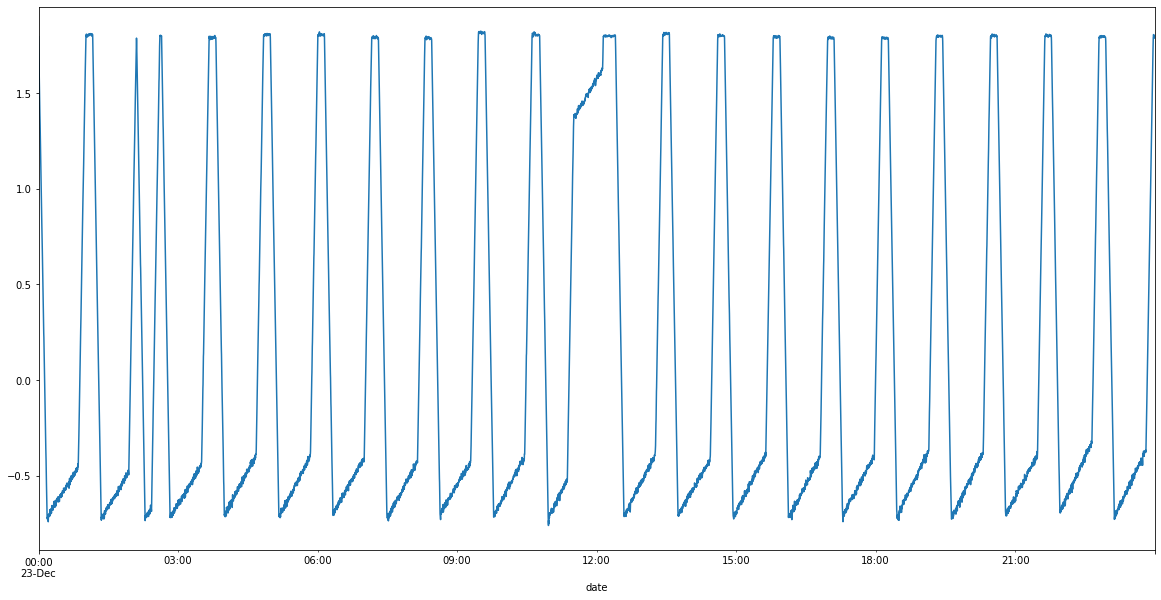

In [205]:
norm_data.iloc[2880:2880+360*24].LIT101.plot(figsize=(20,10))

In [206]:
len(norm_data.columns)

51

In [207]:
norm_data.iloc[:,:5]

,FIT101,LIT101,MV101,P101,P102
date,,,,,
2015-12-22 16:00:00,0.559332,-2.541648,0.620054,0.585495,0.0
2015-12-22 16:00:10,0.683354,-2.536311,0.620054,0.585495,0.0
2015-12-22 16:00:20,0.562355,-2.531313,0.620054,0.585495,0.0
2015-12-22 16:00:30,0.642362,-2.528166,0.620054,0.585495,0.0
2015-12-22 16:00:40,0.640582,-2.529863,0.620054,0.585495,0.0
...,...,...,...,...,...
2015-12-28 09:59:10,0.696124,-0.483187,0.620054,0.585495,0.0
2015-12-28 09:59:20,0.599025,-0.478127,0.620054,0.585495,0.0
2015-12-28 09:59:30,0.593544,-0.490622,0.620054,0.585495,0.0


In [51]:
norm_data.iloc[:,:5].to_csv("./dataset/SWaT/test.csv", mode='w')

## Anomaly test set 구성

## Experiments: Informer 시계열 예측 모형

In [1]:
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch

In [9]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'SWaT' # data
args.root_path = './dataset/SWaT/' # root path of data file
#args.data_path = 'SWaT_normalised_normal.csv' # data file
args.data_path = 'SWaT_standard_normalised_normal.csv' # data file
args.features = 'M' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'FIT101' # target feature in S or MS task
args.freq = 's' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = './informer_checkpoints' # location of model checkpoints

args.seq_len = 6*60 # 지금 돌아가는게 StandardScaler. 이전거는 MinMaxScaler로 seq_len는 6*60*2 #24*7 # input sequence length of Informer encoder
args.label_len = 6*30 #48 # start token length of Informer decoder
args.pred_len = 6*10 #24 # prediction sequence length
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

# 얘네들은 feature 개수 의미하는건가?
args.enc_in = 51 # encoder input size
args.dec_in = 51 # decoder input size
args.c_out = 51 # output size

args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 4 # num of encoder layers
args.d_layers = 2 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
#args.freq = 's'

args.batch_size = 32 
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type2'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 50
args.patience = 5
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = False
args.devices = '0,1,2,3'


In [10]:
args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.devices = args.devices.replace(' ','')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.gpu = args.device_ids[0]

In [11]:
args.use_gpu

True

In [12]:
print('Args in experiment:')
print(args)

Args in experiment:
{'model': 'informer', 'data': 'SWaT', 'root_path': './dataset/SWaT/', 'data_path': 'SWaT_standard_normalised_normal.csv', 'features': 'M', 'target': 'FIT101', 'freq': 's', 'checkpoints': './informer_checkpoints', 'seq_len': 360, 'label_len': 180, 'pred_len': 60, 'enc_in': 51, 'dec_in': 51, 'c_out': 51, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 4, 'd_layers': 2, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'distil': True, 'output_attention': False, 'mix': True, 'padding': 0, 'batch_size': 32, 'learning_rate': 0.0001, 'loss': 'mse', 'lradj': 'type2', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 50, 'patience': 5, 'des': 'exp', 'use_gpu': True, 'gpu': 0, 'use_multi_gpu': False, 'devices': '0,1,2,3'}


In [13]:
Exp = Exp_Informer

In [14]:
for ii in range(args.itr):
    # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features, 
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # set experiments
    exp = Exp(args)
    
    # train
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)
    
    # validation
    print('>>>>>>>validation : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.validation(setting)

    # test
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)

    torch.cuda.empty_cache()

Use GPU: cuda:0
>>>>>>>start training : informer_SWaT_ftM_sl360_ll180_pl60_dm512_nh8_el4_dl2_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 37021
val 6061
test 6061
	iters: 100, epoch: 1 | loss: 0.2002779
	speed: 0.1081s/iter; left time: 6239.3908s
	iters: 200, epoch: 1 | loss: 0.2739920
	speed: 0.1044s/iter; left time: 6013.1475s
	iters: 300, epoch: 1 | loss: 0.1494607
	speed: 0.1054s/iter; left time: 6062.0568s
	iters: 400, epoch: 1 | loss: 0.6261653
	speed: 0.1087s/iter; left time: 6239.9683s
	iters: 500, epoch: 1 | loss: 0.1741598
	speed: 0.1084s/iter; left time: 6213.7421s
	iters: 600, epoch: 1 | loss: 0.0615831
	speed: 0.1091s/iter; left time: 6242.4593s
	iters: 700, epoch: 1 | loss: 0.0426406
	speed: 0.1079s/iter; left time: 6160.3184s
	iters: 800, epoch: 1 | loss: 0.4631635
	speed: 0.1071s/iter; left time: 6103.5967s
	iters: 900, epoch: 1 | loss: 0.6824397
	speed: 0.1065s/iter; left time: 6057.8413s
	iters: 1000, epoch: 1 | loss: 0.1249362
	speed:

## Anomaly detection

In [16]:
import numpy as np
path = './results/informer_SWaT_ftM_sl360_ll180_pl60_dm512_nh8_el4_dl2_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'
val_preds = np.load(path+'/val_pred.npy')
val_trues = np.load(path+'/val_true.npy')
test_preds = np.load(path+'/test_pred.npy')
test_trues = np.load(path+'/test_true.npy')

In [229]:
val_preds.shape, val_trues.shape, test_preds.shape, test_trues.shape

((5760, 360, 51), (5760, 360, 51), (5760, 360, 51), (5760, 360, 51))

In [72]:
val_anomaly.shape, test_anomaly.shape

((672,), (1440,))

In [234]:
val_recons = []
for i in range(len(val_trues)):
    recons = sum(np.square(val_trues[i].reshape(-1) - val_preds[i].reshape(-1)))
    val_recons.append(recons)

test_recons = []
for i in range(len(test_trues)):
    recons = sum(np.square(test_trues[i].reshape(-1) - test_preds[i].reshape(-1)))
    test_recons.append(recons)

In [235]:
val_recons[:60]

[13.765151663777942,
 14.62964676739648,
 25.551343509097933,
 25.314932738314383,
 23.436548835248686,
 19.45466295722872,
 16.687309663859196,
 18.794326900038868,
 19.155391948343095,
 19.223041959565307,
 18.289433548118723,
 13.019734923786018,
 13.547852786665317,
 13.677249041000323,
 15.1541460583976,
 12.509210994619934,
 11.217062805138994,
 10.613349215912422,
 11.112576479165,
 12.639482526441725,
 9.582619803317357,
 11.215587344864616,
 9.908172988973092,
 9.891482811886817,
 8.612970465847866,
 9.8224204685539,
 8.547581335529685,
 3.737177888629958,
 4.681452847678884,
 7.866059563588351,
 7.03524227825983,
 5.1635652537152055,
 6.069038993678987,
 5.5002516597742215,
 6.60349169728579,
 5.806385118805338,
 4.661781003364013,
 4.945206948672421,
 4.509201925422531,
 3.5640278292703442,
 3.21566652182446,
 2.921739348872052,
 3.3765447957848664,
 3.68696958682267,
 5.206029184279032,
 8.839498183777323,
 8.065303937299177,
 5.609552821872057,
 4.704881234152708,
 6.01844

In [153]:
test_label[576:576+24]

,label
date,
2014-12-25 00:00:00,1
2014-12-25 01:00:00,1
2014-12-25 02:00:00,1
2014-12-25 03:00:00,1
2014-12-25 04:00:00,1
2014-12-25 05:00:00,1
2014-12-25 06:00:00,1
2014-12-25 07:00:00,1
2014-12-25 08:00:00,1


In [159]:
test_recons[:24]

[2.928475100256037,
 2.556174802735768,
 2.4358704980305674,
 3.4938710997266753,
 5.356803104747087,
 8.604653303977102,
 11.879936695797369,
 16.862984520473233,
 21.708084147277987,
 23.222581756752334,
 24.72370982708526,
 23.430598065722734,
 19.76559027704002,
 14.557082674698904,
 7.6126723320630845,
 3.743804339240455,
 2.0455320628825575,
 2.5972800309755257,
 2.418493692181073,
 3.170907581702295,
 4.393212277907878,
 3.713162757223472,
 4.693679154361234,
 3.4956615572627925]

In [157]:
test_recons[576-12-12:576+24+12+12]

[12.858260401291773,
 11.936195480957394,
 10.864607783252723,
 11.013949657790363,
 11.634367263755848,
 11.024757939158008,
 11.294862758368254,
 10.88991038594395,
 13.964885727036744,
 18.28198009170592,
 22.736908801598474,
 26.387399122773786,
 26.735569956334075,
 26.7923937960295,
 26.082669474883005,
 24.852575345910736,
 24.146304843903636,
 27.583579378202558,
 30.60813639960361,
 31.20800507489912,
 32.84252201230265,
 36.83775697791134,
 37.37361762237697,
 41.16844773897901,
 41.34551392309368,
 41.130664085794706,
 42.26020056474954,
 46.375584315508604,
 43.642181711271405,
 42.484434098005295,
 41.025109089910984,
 38.603539407253265,
 36.251848757267,
 35.60554641485214,
 34.98184379655868,
 37.45491498056799,
 35.38618246919941,
 34.09448600746691,
 29.5952855439391,
 27.764335753396153,
 28.224334824830294,
 29.320606738328934,
 27.884259155020118,
 25.176225524395704,
 24.234293658286333,
 25.71850723596799,
 26.549219514243305,
 28.68313410464907,
 28.359204328331

In [158]:
test_recons[576-12:576+24+12]

[26.735569956334075,
 26.7923937960295,
 26.082669474883005,
 24.852575345910736,
 24.146304843903636,
 27.583579378202558,
 30.60813639960361,
 31.20800507489912,
 32.84252201230265,
 36.83775697791134,
 37.37361762237697,
 41.16844773897901,
 41.34551392309368,
 41.130664085794706,
 42.26020056474954,
 46.375584315508604,
 43.642181711271405,
 42.484434098005295,
 41.025109089910984,
 38.603539407253265,
 36.251848757267,
 35.60554641485214,
 34.98184379655868,
 37.45491498056799,
 35.38618246919941,
 34.09448600746691,
 29.5952855439391,
 27.764335753396153,
 28.224334824830294,
 29.320606738328934,
 27.884259155020118,
 25.176225524395704,
 24.234293658286333,
 25.71850723596799,
 26.549219514243305,
 28.68313410464907,
 28.359204328331543,
 30.692208033055067,
 29.7309688182074,
 30.699151878245175,
 23.474862952061812,
 21.75803957611788,
 19.38589511020109,
 16.246177405351773,
 18.443976799957454,
 16.772895712405443,
 14.470897531253286,
 16.032186550088227]

In [106]:
val_label.iloc[624:624+24]

,label
date,
2014-11-27 00:00:00,1
2014-11-27 01:00:00,1
2014-11-27 02:00:00,1
2014-11-27 03:00:00,1
2014-11-27 04:00:00,1
2014-11-27 05:00:00,1
2014-11-27 06:00:00,1
2014-11-27 07:00:00,1
2014-11-27 08:00:00,1


In [147]:
val_recons[24-12:48+12]

[11.685191883949301,
 11.821204837178811,
 10.990153941631434,
 8.93879350538009,
 9.832007091026753,
 11.008287484655739,
 12.08062516686391,
 11.685150344361318,
 10.054114029771881,
 10.454557033671946,
 10.245669818526949,
 10.083025658095721,
 10.317315340507776,
 10.497906700322346,
 5.715775899239816,
 4.0498106111526795,
 3.748405039717909,
 3.0645600060233846,
 2.837031919450965,
 3.6969386072596535,
 4.496543063374702,
 3.678336127079092,
 4.317825591715518,
 3.460774874096387,
 3.1949397861535545,
 3.0216506693977863,
 3.123151513427729,
 2.6337495458942044,
 3.4203269512508996,
 4.562896577175707,
 2.2926961734192446,
 2.4507437424035743,
 2.1683483086526394,
 2.567828978644684,
 2.4776683927193517,
 2.293721158188198,
 2.464542468514992,
 3.6683771653624717,
 3.5035100369241263,
 2.659846481634304,
 2.3997994482652985,
 1.6282872287993087,
 1.2958690022787778,
 2.473527068090334,
 1.9544815437620855,
 2.0404966842615977,
 1.6852815495221876,
 1.0992653809225885]

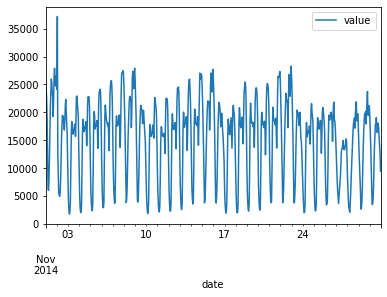

In [138]:
nyc.iloc[2832:3552].plot()

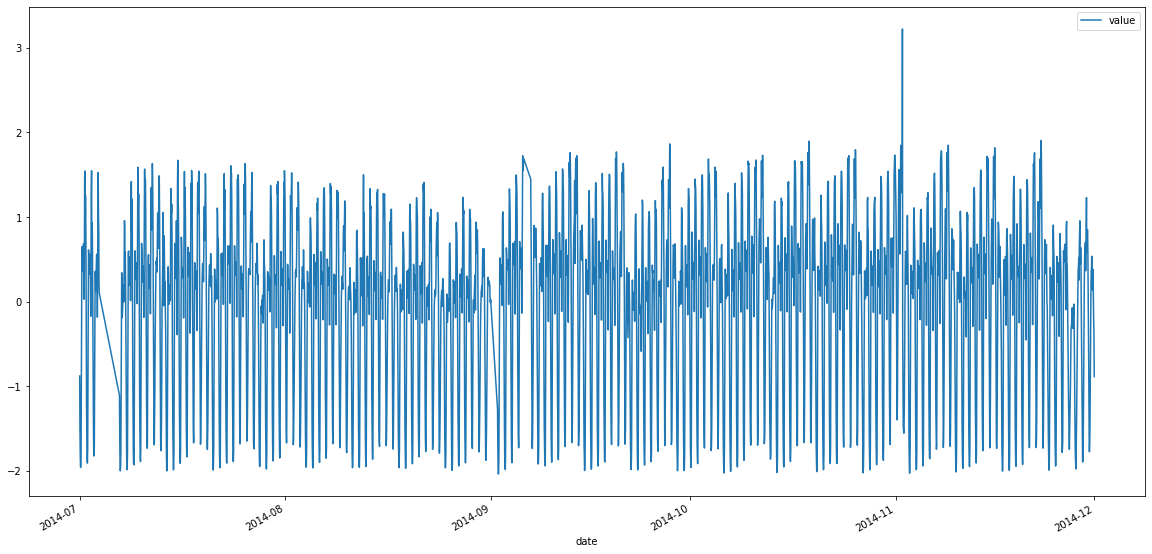

In [237]:
nyc.iloc[0:3552].plot(figsize=(20,10))

In [141]:
nyc.iloc[2832+24-12:2832+24+24]

,value
date,
2014-11-01 12:00:00,25967.5
2014-11-01 13:00:00,25349.5
2014-11-01 14:00:00,23638.0
2014-11-01 15:00:00,22768.0
2014-11-01 16:00:00,19225.5
2014-11-01 17:00:00,22292.0
2014-11-01 18:00:00,26312.0
2014-11-01 19:00:00,27912.0
2014-11-01 20:00:00,26258.5


In [144]:
nyc.iloc[2832+624-12:2832+648+12]

,value
date,
2014-11-26 12:00:00,19914.5
2014-11-26 13:00:00,20018.0
2014-11-26 14:00:00,19364.0
2014-11-26 15:00:00,18235.0
2014-11-26 16:00:00,14784.5
2014-11-26 17:00:00,18554.5
2014-11-26 18:00:00,21297.5
2014-11-26 19:00:00,21830.0
2014-11-26 20:00:00,18518.5


## Prediction

In [ ]:
import os

# set saved model path
setting = 'informer_ETTh1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'
# path = os.path.join(args.checkpoints,setting,'checkpoint.pth')

In [ ]:
# If you already have a trained model, you can set the arguments and model path, then initialize a Experiment and use it to predict
# Prediction is a sequence which is adjacent to the last date of the data, and does not exist in the data
# If you want to get more information about prediction, you can refer to code `exp/exp_informer.py function predict()` and `data/data_loader.py class Dataset_Pred`

exp = Exp(args)

exp.predict(setting, True)

Use GPU: cuda:0
pred 1


In [ ]:
# the prediction will be saved in ./results/{setting}/real_prediction.npy
import numpy as np

prediction = np.load('./results/'+setting+'/real_prediction.npy')

prediction.shape

(1, 24, 7)

### More details about Prediction - prediction function

In [ ]:
# here is the detailed code of function predict

def predict(exp, setting, load=False):
    pred_data, pred_loader = exp._get_data(flag='pred')
        
    if load:
        path = os.path.join(exp.args.checkpoints, setting)
        best_model_path = path+'/'+'checkpoint.pth'
        exp.model.load_state_dict(torch.load(best_model_path))

    exp.model.eval()
        
    preds = []
        
    for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(pred_loader):
        batch_x = batch_x.float().to(exp.device)
        batch_y = batch_y.float()
        batch_x_mark = batch_x_mark.float().to(exp.device)
        batch_y_mark = batch_y_mark.float().to(exp.device)

        # decoder input
        if exp.args.padding==0:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        elif exp.args.padding==1:
            dec_inp = torch.ones([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        else:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        dec_inp = torch.cat([batch_y[:,:exp.args.label_len,:], dec_inp], dim=1).float().to(exp.device)
        # encoder - decoder
        if exp.args.use_amp:
            with torch.cuda.amp.autocast():
                if exp.args.output_attention:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
                else:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        else:
            if exp.args.output_attention:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
            else:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        f_dim = -1 if exp.args.features=='MS' else 0
        batch_y = batch_y[:,-exp.args.pred_len:,f_dim:].to(exp.device)
        
        pred = outputs.detach().cpu().numpy()#.squeeze()
        
        preds.append(pred)

    preds = np.array(preds)
    preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])
    
    # result save
    folder_path = './results/' + setting +'/'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    np.save(folder_path+'real_prediction.npy', preds)
    
    return preds


In [ ]:
# you can also use this prediction function to get result
prediction = predict(exp, setting, True)

pred 1


In [ ]:
prediction.shape

(1, 24, 7)

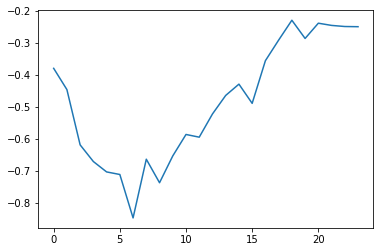

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(prediction[0,:,-1])
plt.show()

### More details about Prediction - prediction dataset

You can give a `root_path` and `data_path` of the data you want to forecast, and set `seq_len`, `label_len`, `pred_len` and other arguments as other Dataset. The difference is that you can set a more detailed freq such as `15min` or `3h` to generate the timestamp of prediction series.

`Dataset_Pred` only has one sample (including `encoder_input: [1, seq_len, dim]`, `decoder_token: [1, label_len, dim]`, `encoder_input_timestamp: [1, seq_len, date_dim]`, `decoder_input_timstamp: [1, label_len+pred_len, date_dim]`). It will intercept the last sequence of the given data (seq_len data) to forecast the unseen future sequence (pred_len data).

In [ ]:
from data.data_loader import Dataset_Pred
from torch.utils.data import DataLoader

In [ ]:
Data = Dataset_Pred
timeenc = 0 if args.embed!='timeF' else 1
flag = 'pred'; shuffle_flag = False; drop_last = False; batch_size = 1

freq = args.detail_freq

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    target=args.target,
    timeenc=timeenc,
    freq=freq
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [ ]:
len(data_set), len(data_loader)

(1, 1)

## Visualization

In [216]:
# When we finished exp.train(setting) and exp.test(setting), we will get a trained model and the results of test experiment
# The results of test experiment will be saved in ./results/{setting}/pred.npy (prediction of test dataset) and ./results/{setting}/true.npy (groundtruth of test dataset)

#preds = np.load('./results/'+setting+'/pred.npy')
#trues = np.load('./results/'+setting+'/true.npy')

# [samples, pred_len, dimensions]
val_preds.shape, val_trues.shape

((5920, 180, 51), (5920, 180, 51))

In [13]:
import matplotlib.pyplot as plt
#import seaborn as sns

In [ ]:
nyc.iloc[3552+745]

date     2015-01-01 01:00:00
value                  29292
Name: 4297, dtype: object

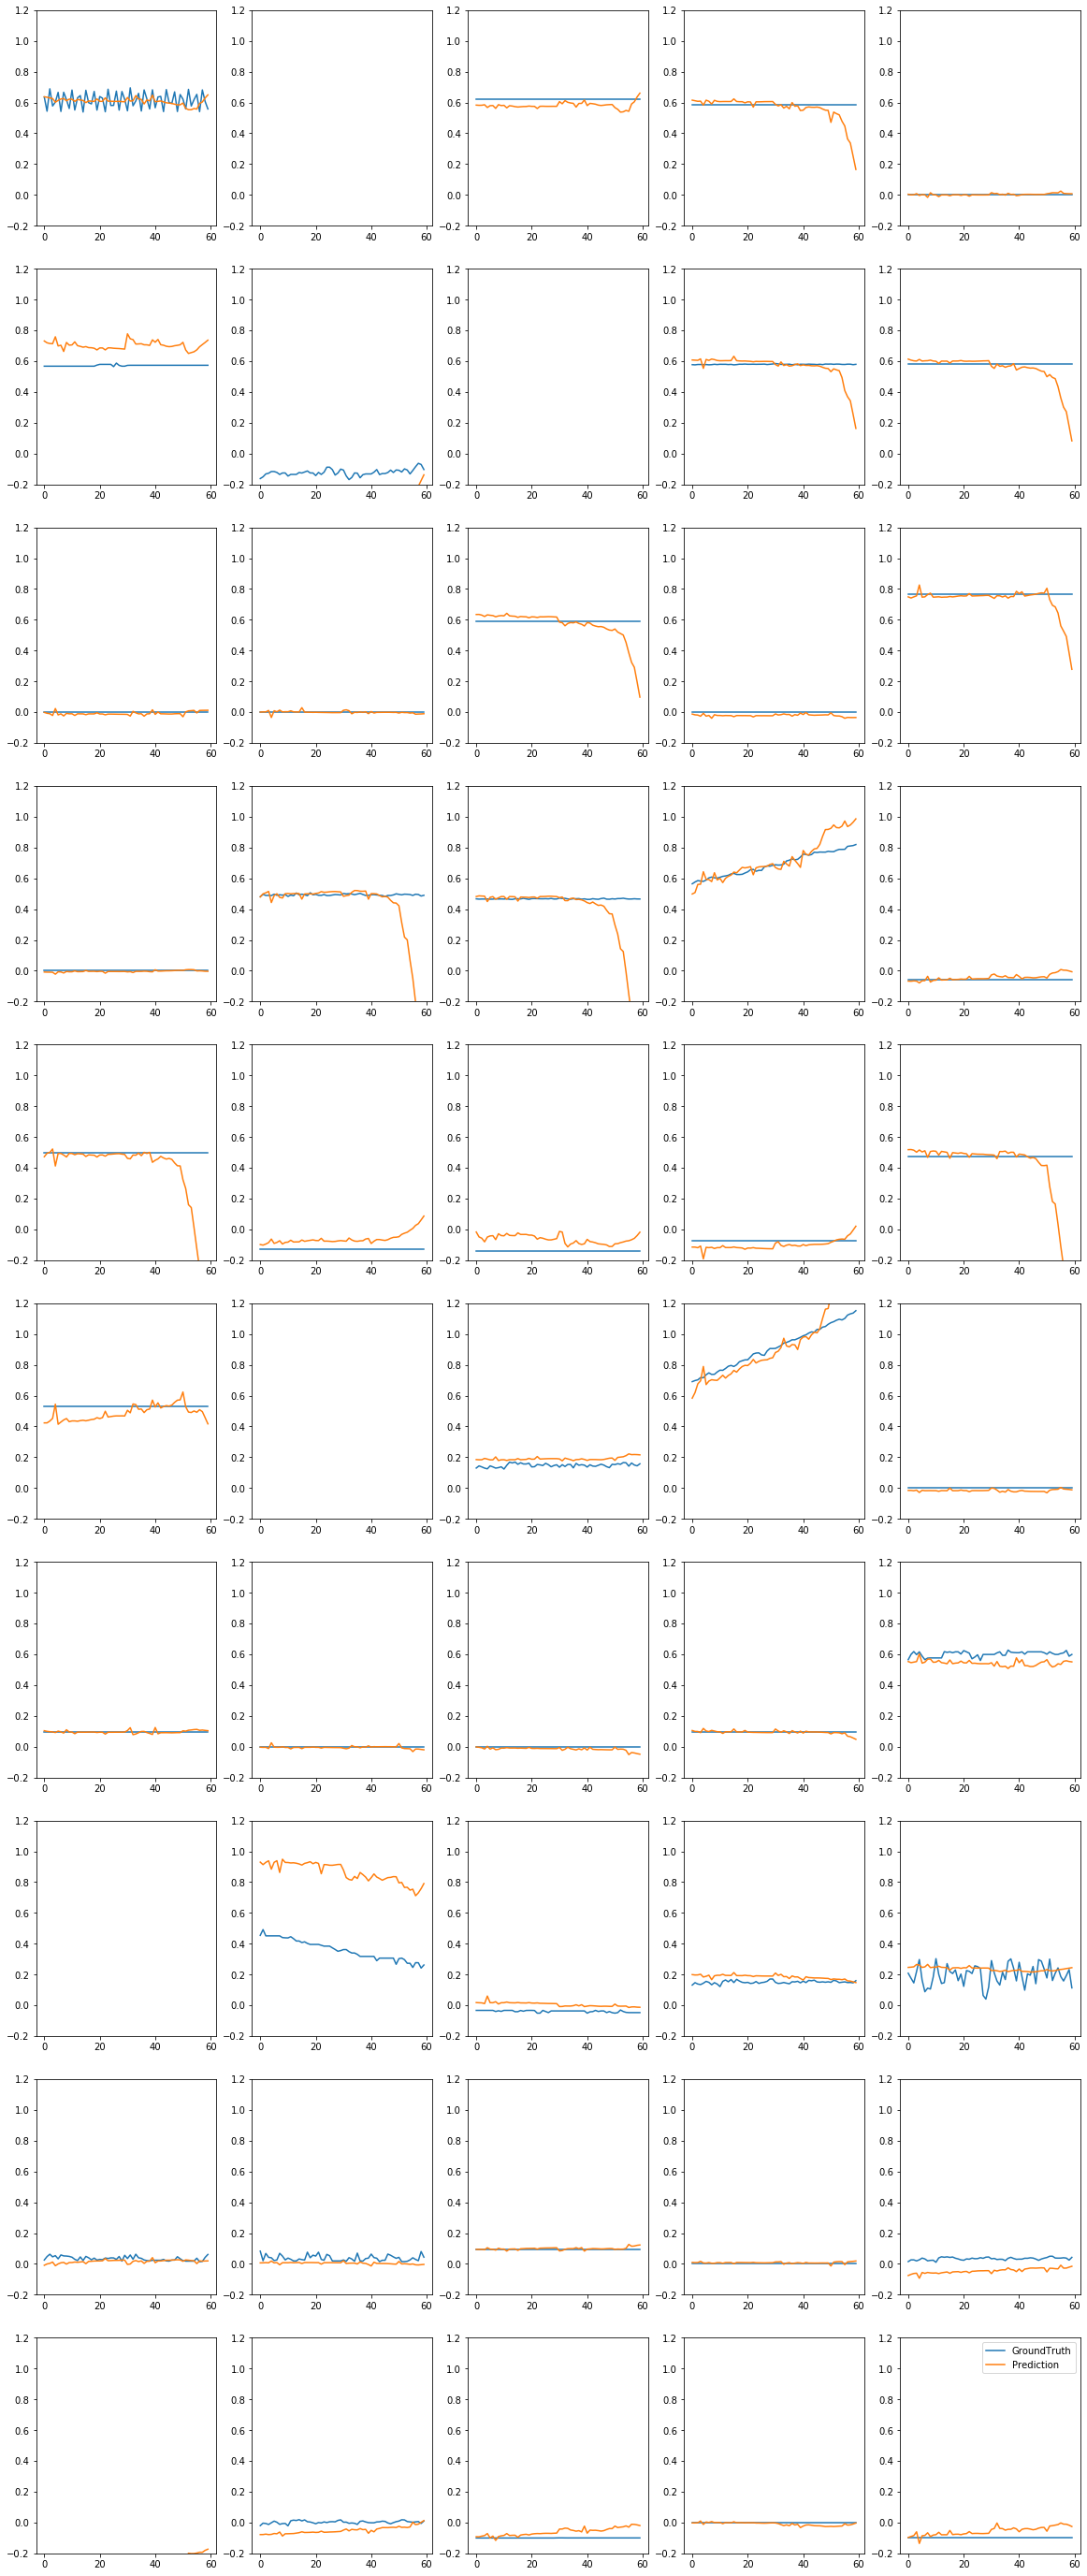

In [17]:
# MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 50))

idx = 3000
 
for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.ylim([-0.2, 1.2])    
    plt.plot(val_trues[idx,:,i], label='GroundTruth')
    plt.plot(val_preds[idx,:,i], label='Prediction')


plt.legend()
plt.show()

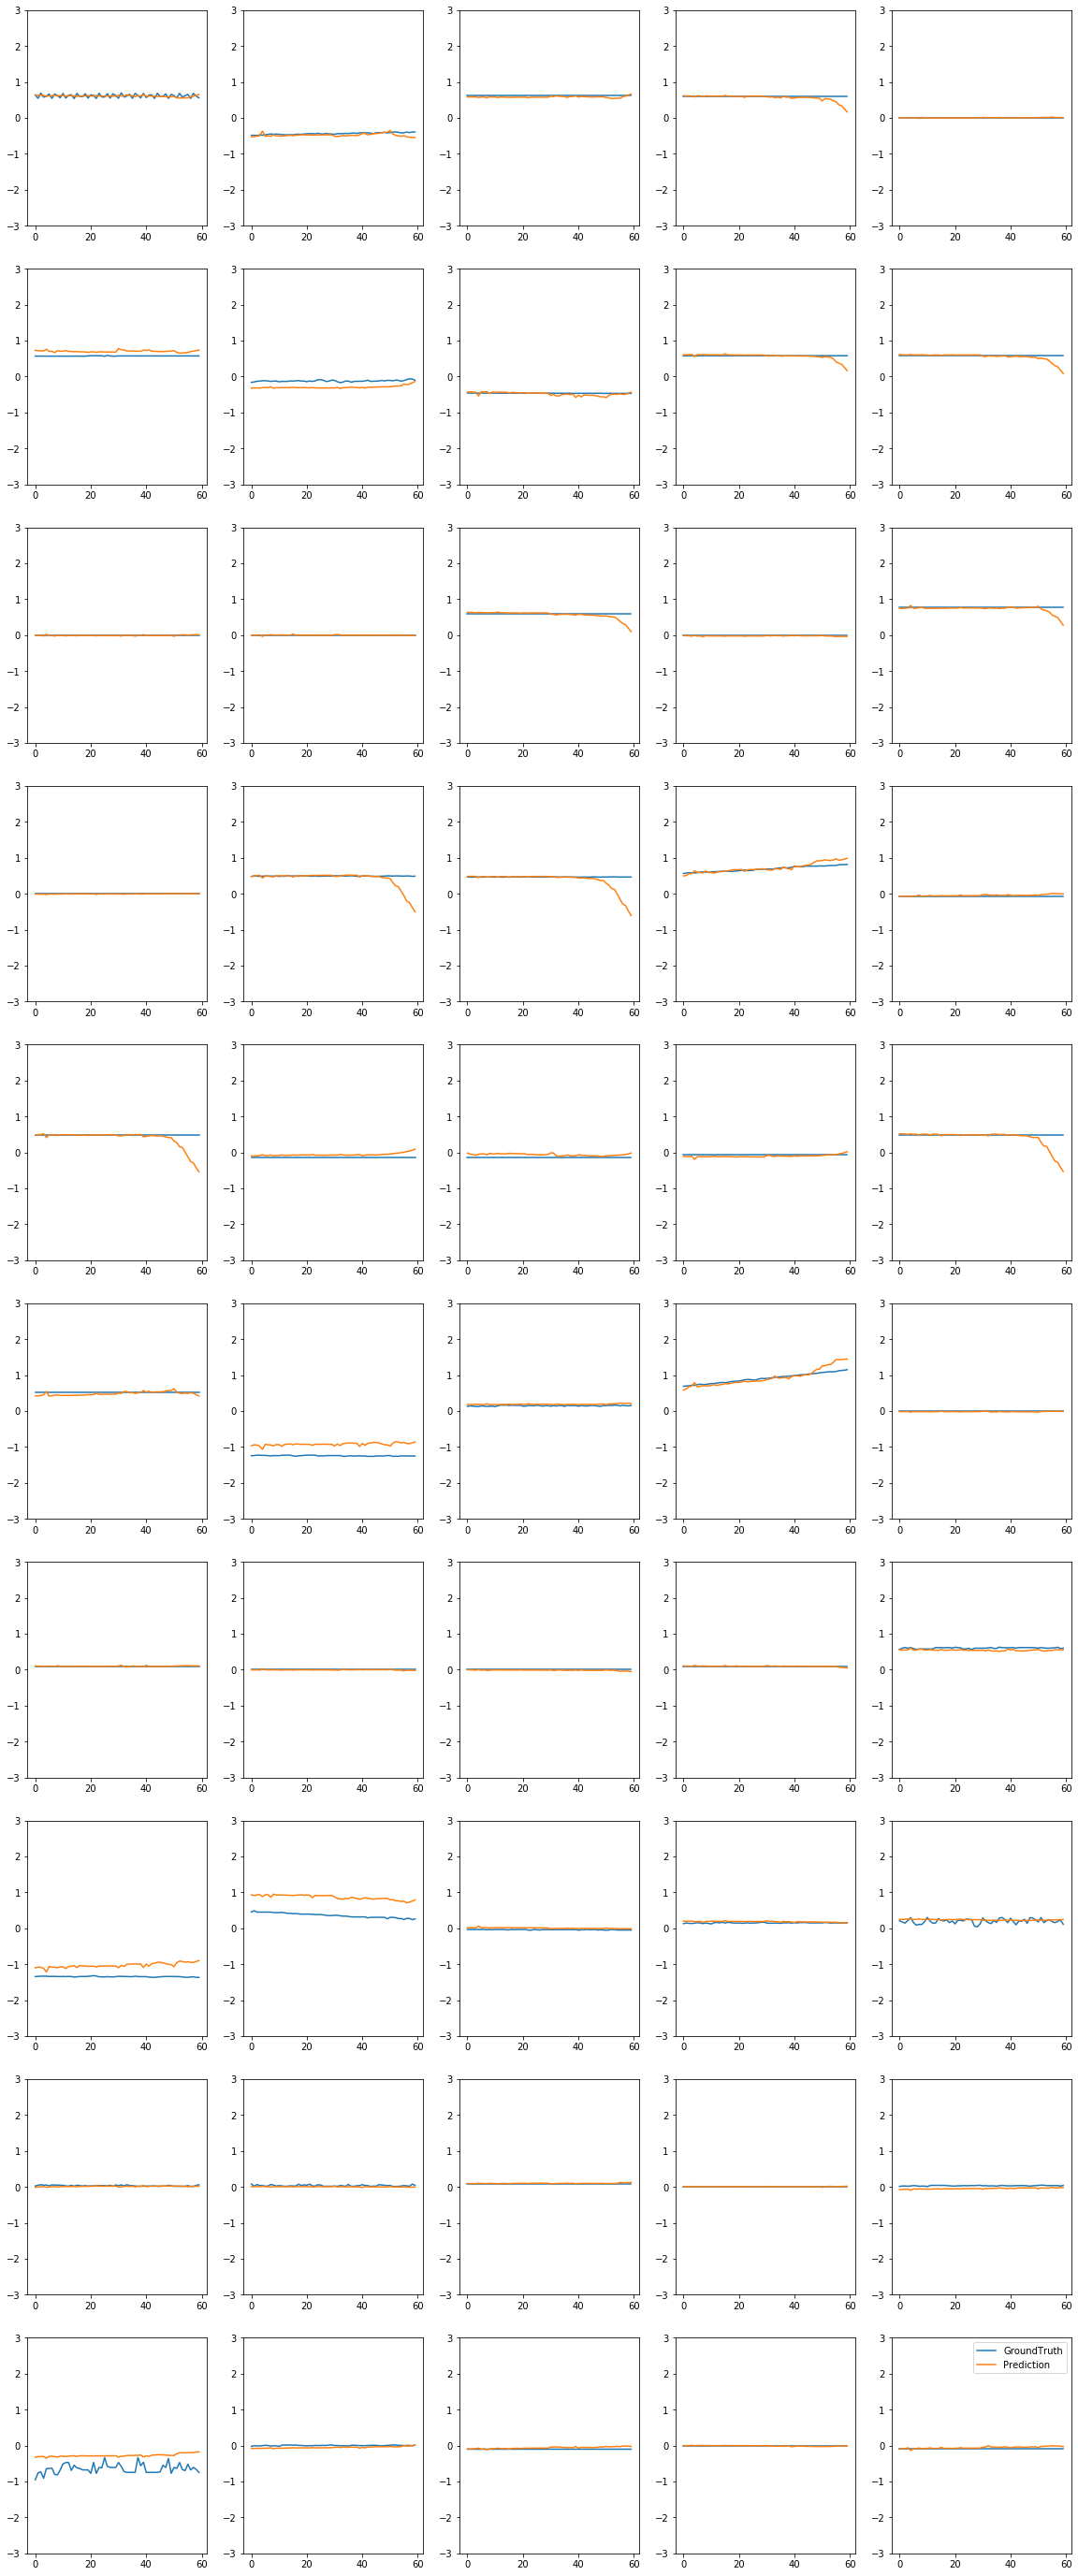

In [18]:
# StandardScaler
# lr=0.0001
# args.seq_len = 6*60*3, args.label_len = 6*60, args.pred_len = 6*30 
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 50))

idx = 3000
 
for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.ylim([-3.0, 3.0])    
    plt.plot(val_trues[idx,:,i], label='GroundTruth')
    plt.plot(val_preds[idx,:,i], label='Prediction')


plt.legend()
plt.show()

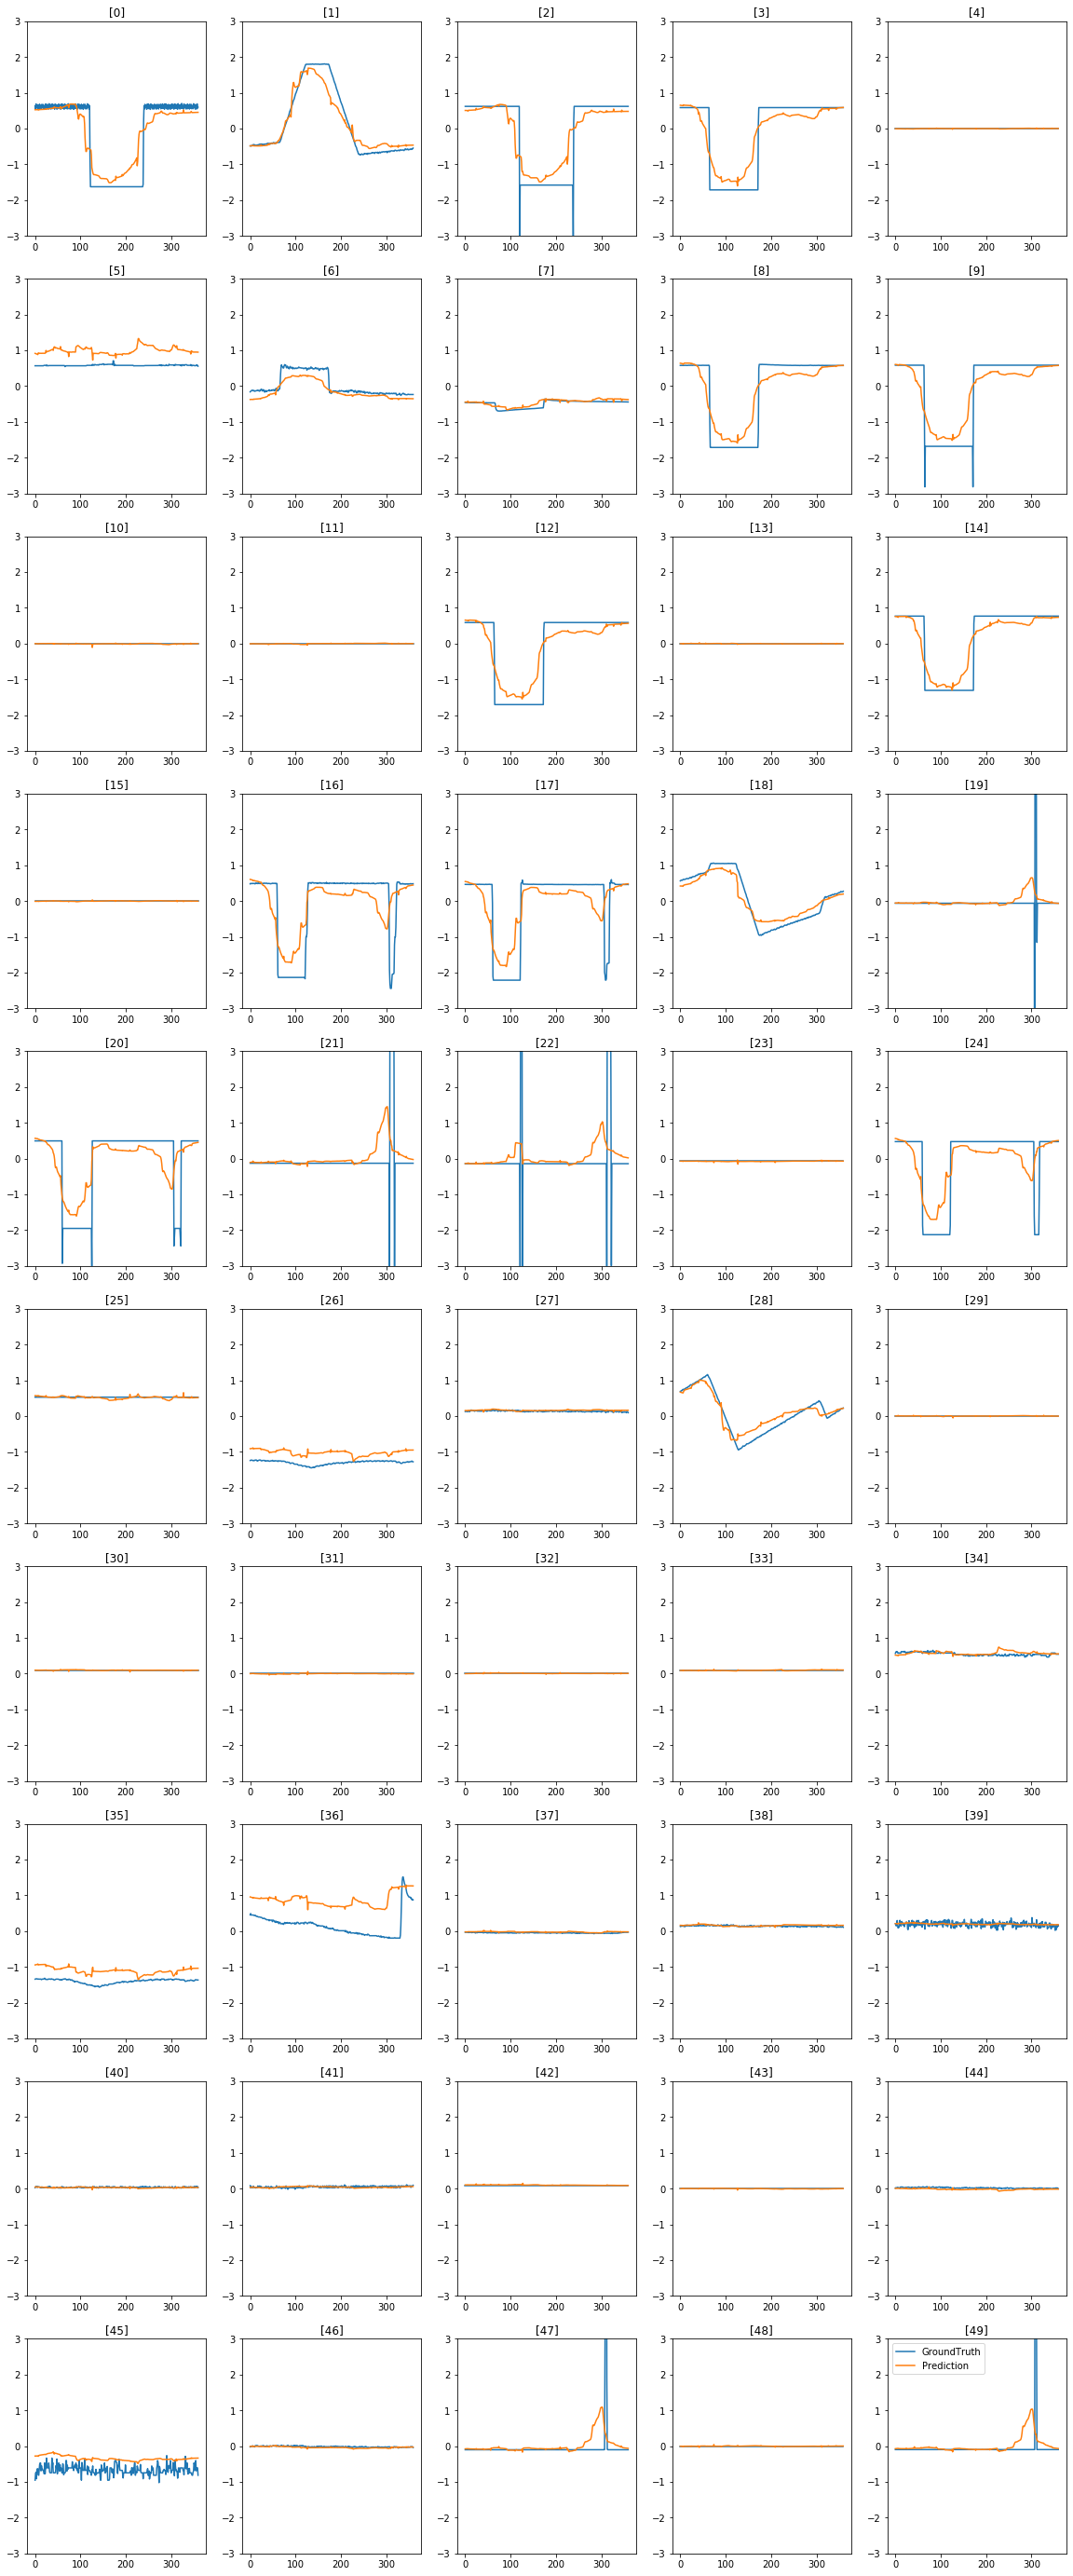

In [231]:
# informer_SWaT_ftM_sl1080_ll720_pl360_dm512_nh8_el6_dl2_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0
# StandardScaler
# lr=0.0001
# e_layer = 6
# args.seq_len = 6*60*3, args.label_len = 6*60*2, args.pred_len = 6*60*1 
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 50))

idx = 3000
 
for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.ylim([-3.0, 3.0])    
    plt.plot(val_trues[idx,:,i], label='GroundTruth')
    plt.plot(val_preds[idx,:,i], label='Prediction')
    plt.title(f'[{i}]')


plt.legend()
plt.show()

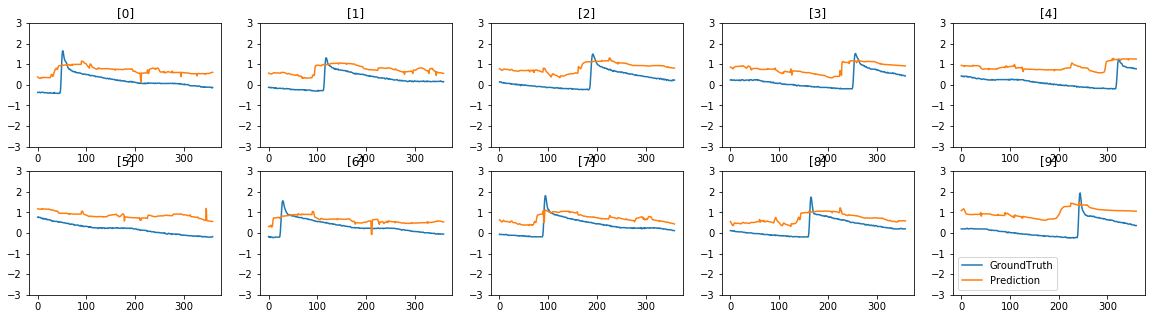

In [255]:
# informer_SWaT_ftM_sl1080_ll720_pl360_dm512_nh8_el6_dl2_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0
# StandardScaler
# lr=0.0001
# e_layer = 6
# args.seq_len = 6*60*3, args.label_len = 6*60*2, args.pred_len = 6*60*1 
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

fea =36 # 36
 
for i, j in enumerate(list(range(2000, 5600, 360))):
    plt.subplot(2, 5, i+1)
    plt.ylim([-3.0, 3.0])    
    plt.plot(val_trues[j,:,fea], label='GroundTruth')
    plt.plot(val_preds[j,:,fea], label='Prediction')
    plt.title(f'[{i}]')


plt.legend()
plt.show()

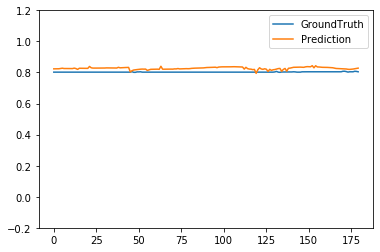

In [177]:
# draw OT prediction
plt.figure()
fea = 5
idx = 2100
plt.ylim([-0.2, 1.2])     
plt.plot(val_trues[idx,:,fea], label='GroundTruth')
plt.plot(val_preds[idx,:,fea], label='Prediction')
plt.legend()
plt.show()

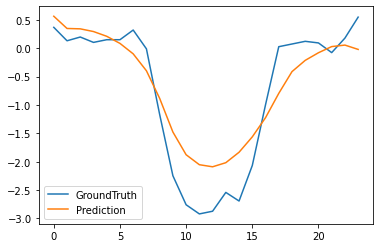

In [ ]:
# draw HUFL prediction
plt.figure()
plt.plot(trues[0,:,0], label='GroundTruth')
plt.plot(preds[0,:,0], label='Prediction')
plt.legend()
plt.show()

In [ ]:
from data.data_loader import Dataset_ETT_hour
from torch.utils.data import DataLoader

Data = Dataset_ETT_hour
timeenc = 0 if args.embed!='timeF' else 1
flag = 'test'; shuffle_flag = False; drop_last = True; batch_size = 1

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    timeenc=timeenc,
    freq=args.freq
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [ ]:
import os

args.output_attention = True

exp = Exp(args)

model = exp.model

setting = 'informer_ETTh1_ftM_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_exp_0'
path = os.path.join(args.checkpoints,setting,'checkpoint.pth')
model.load_state_dict(torch.load(path))

Use GPU: cuda:0


<All keys matched successfully>

In [ ]:
# attention visualization
idx = 0
for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(data_loader):
    if i!=idx:
        continue
    batch_x = batch_x.float().to(exp.device)
    batch_y = batch_y.float()

    batch_x_mark = batch_x_mark.float().to(exp.device)
    batch_y_mark = batch_y_mark.float().to(exp.device)
    
    dec_inp = torch.zeros_like(batch_y[:,-args.pred_len:,:]).float()
    dec_inp = torch.cat([batch_y[:,:args.label_len,:], dec_inp], dim=1).float().to(exp.device)
    
    outputs,attn = model(batch_x, batch_x_mark, dec_inp, batch_y_mark)

In [ ]:
attn[0].shape, attn[1].shape #, attn[2].shape

(torch.Size([1, 8, 96, 96]), torch.Size([1, 8, 49, 49]))

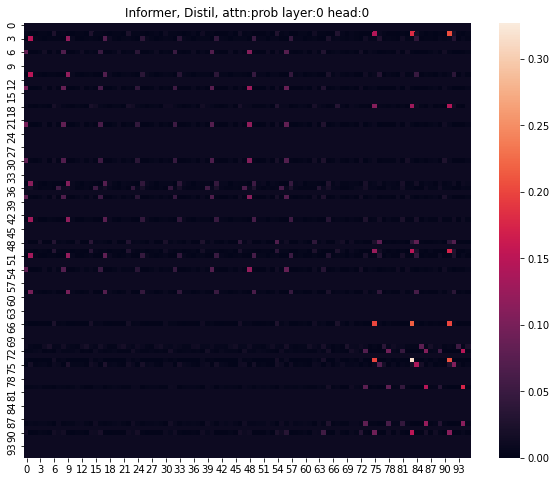

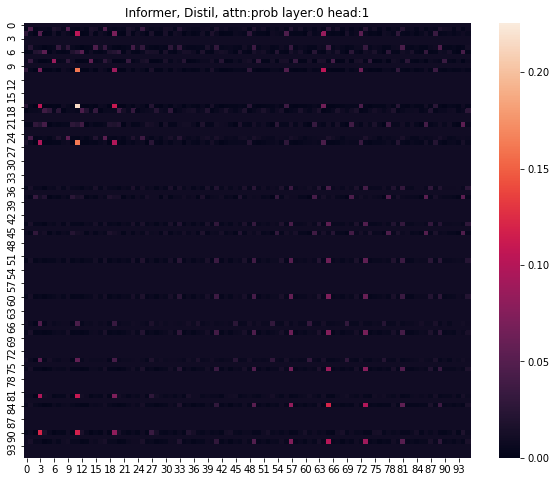

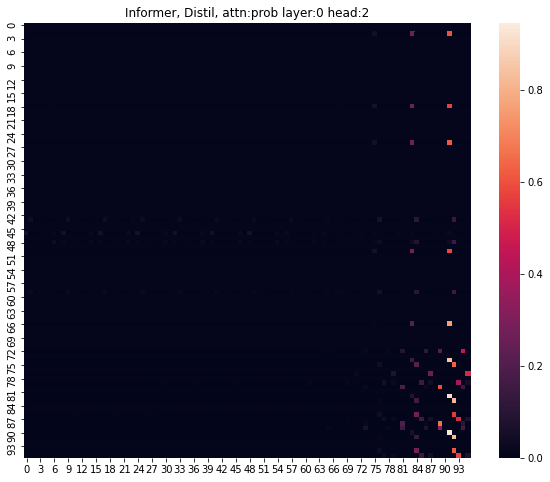

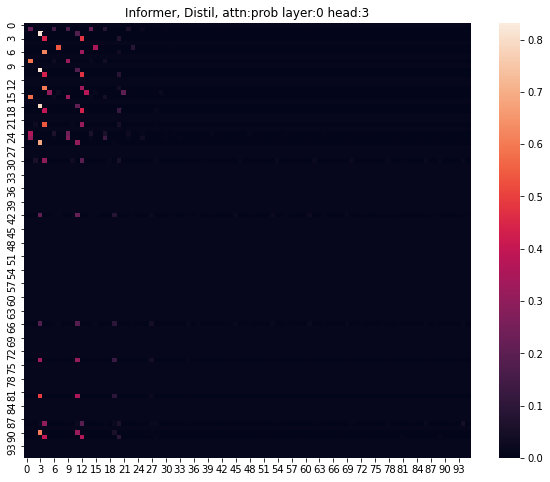

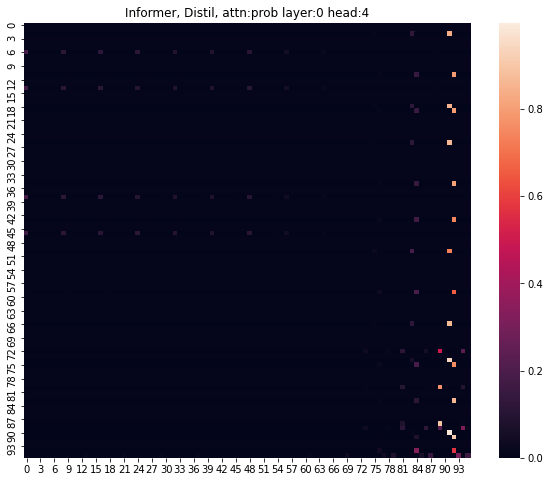

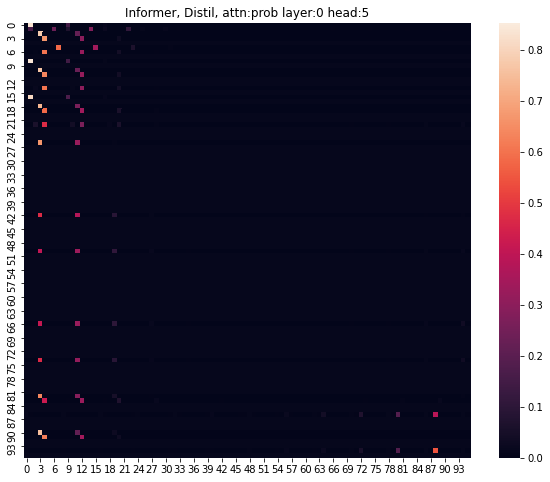

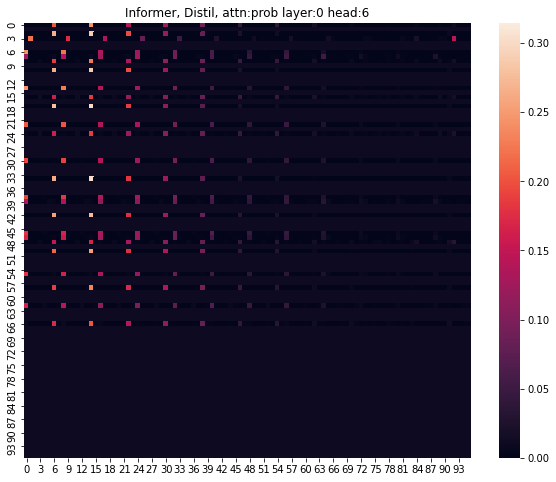

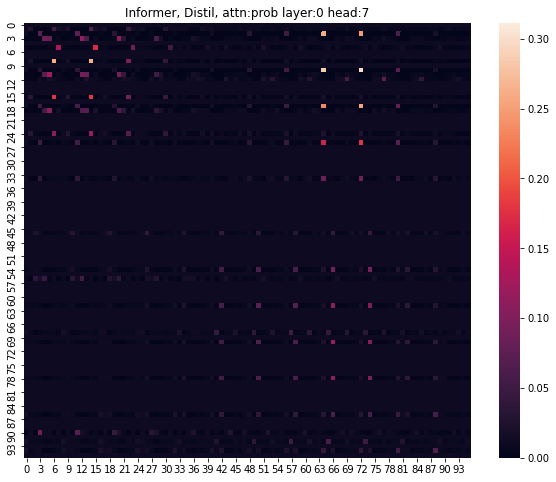

In [ ]:
layer = 0
distil = 'Distil' if args.distil else 'NoDistil'
for h in range(0,8):
    plt.figure(figsize=[10,8])
    plt.title('Informer, {}, attn:{} layer:{} head:{}'.format(distil, args.attn, layer, h))
    A = attn[layer][0,h].detach().cpu().numpy()
    ax = sns.heatmap(A, vmin=0, vmax=A.max()+0.01)
    plt.show()

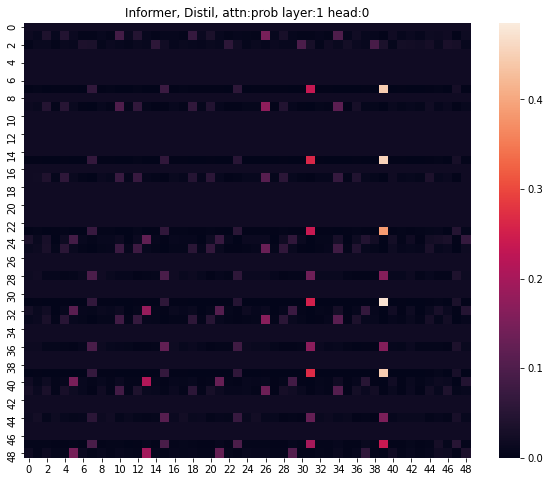

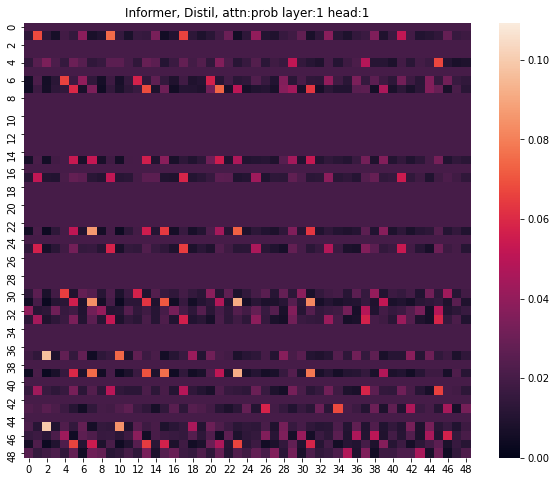

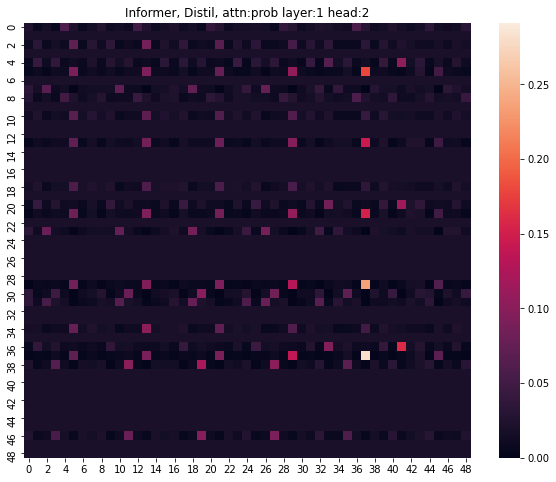

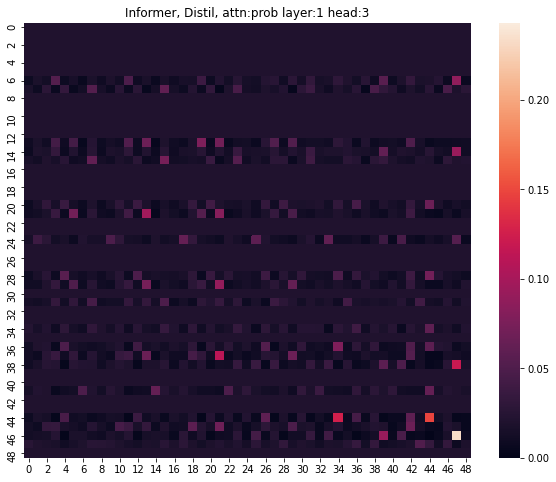

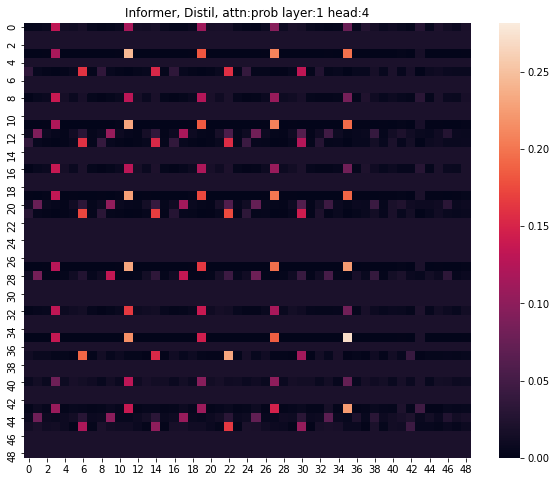

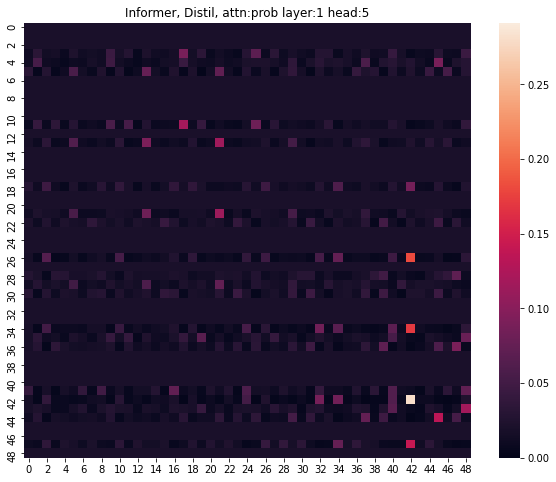

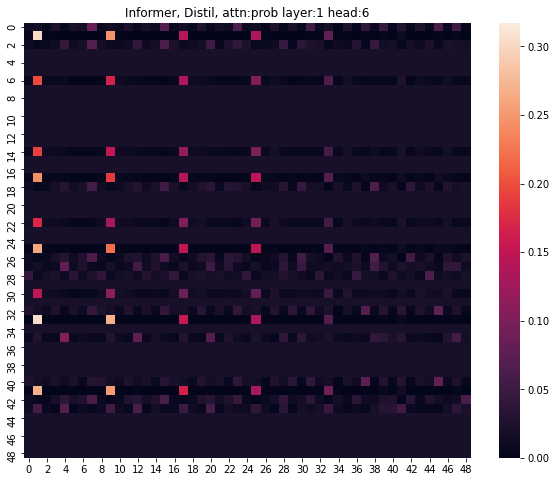

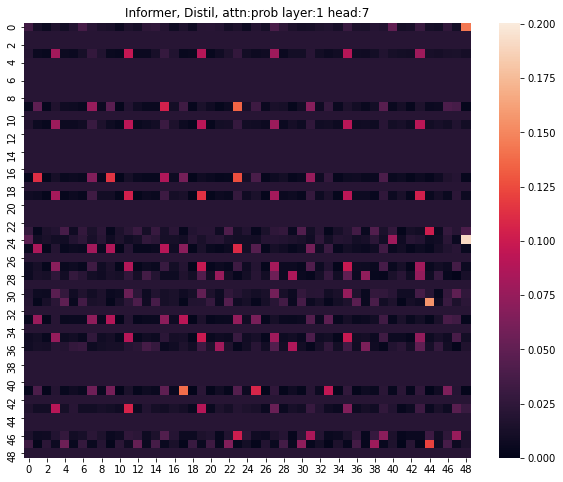

In [ ]:
layer = 1
distil = 'Distil' if args.distil else 'NoDistil'
for h in range(0,8):
    plt.figure(figsize=[10,8])
    plt.title('Informer, {}, attn:{} layer:{} head:{}'.format(distil, args.attn, layer, h))
    A = attn[layer][0,h].detach().cpu().numpy()
    ax = sns.heatmap(A, vmin=0, vmax=A.max()+0.01)
    plt.show()

## Custom Data

Custom data (xxx.csv) has to include at least 2 features: `date`(format: `YYYY-MM-DD hh:mm:ss`) and `target feature`.


In [ ]:
from data.data_loader import Dataset_Custom
from torch.utils.data import DataLoader
import pandas as pd
import os

In [ ]:
# custom data: xxx.csv
# data features: ['date', ...(other features), target feature]

# we take ETTh2 as an example
args.root_path = './ETDataset/ETT-small/'
args.data_path = 'ETTh2.csv'

df = pd.read_csv(os.path.join(args.root_path, args.data_path))

In [ ]:
df.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
1,2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
2,2016-07-01 02:00:00,37.946999,11.309,35.330002,9.007,2.100,0.000,36.465000
3,2016-07-01 03:00:00,38.952000,11.895,35.543999,9.436,3.380,1.215,33.608501
4,2016-07-01 04:00:00,38.113998,11.476,35.410000,9.623,2.036,0.000,31.850500


In [ ]:
'''
We set 'HULL' as target instead of 'OT'

The following frequencies are supported:
        Y   - yearly
            alias: A
        M   - monthly
        W   - weekly
        D   - daily
        B   - business days
        H   - hourly
        T   - minutely
            alias: min
        S   - secondly
'''

args.target = 'HULL'
args.freq = 'h'

Data = Dataset_Custom
timeenc = 0 if args.embed!='timeF' else 1
flag = 'test'; shuffle_flag = False; drop_last = True; batch_size = 1

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    timeenc=timeenc,
    target=args.target, # HULL here
    freq=args.freq # 'h': hourly, 't':minutely
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [ ]:
batch_x,batch_y,batch_x_mark,batch_y_mark = data_set[0]